# Spatial Weights

* [Contiguity](#Contiguity)
* [Distance](#Distance)
    * [k-NN](#$k$-NN)
    * [Threshold](#Threshold)
* [Block](#Block)

In [1]:
%matplotlib inline

import geopandas
import numpy
import pandas
from pysal.lib import weights
from pysal.viz import splot

db = geopandas.read_file("../data/lux_regions.gpkg")

## Contiguity

In [2]:
w_cont = weights.Queen.from_dataframe(db)

In [3]:
w_cont.id_order[:5]

[0, 1, 2, 3, 4]

In [4]:
w_cont = weights.Queen.from_dataframe(db, idVariable="LAU2")

In [5]:
w_cont.id_order[:5]

['0101', '0102', '0103', '0104', '0105']

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fed887c2d30>)

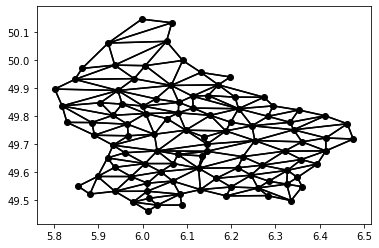

In [6]:
w_cont.plot(db.set_index("LAU2"))

## Distance

### $k$-NN

In [7]:
w_k5 = weights.KNN.from_dataframe(db, k=5)

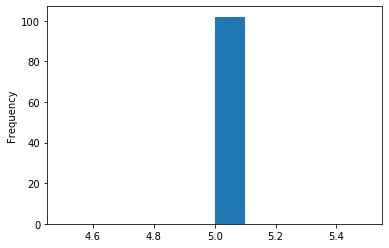

In [8]:
pandas.Series(w_k5.cardinalities).plot.hist()

### Threshold

In [9]:
db.crs

{'init': 'epsg:4326'}

* 500m buffer

In [10]:
# EPSG:2169 --> http://epsg.io/2169
w_dist = weights.DistanceBand.from_dataframe(db.to_crs(epsg=2169), 
                                             500)

/opt/conda/lib/python3.7/site-packages/pysal/lib/weights/weights.py:168: UserWarning: There are 102 disconnected observations 
  Island ids: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101
  " Island ids: %s" % ', '.join(str(island) for island in self.islands))


* Everyone at least with one neighbor

In [11]:
pts = db.to_crs(epsg=2169)\
        .centroid
xys = numpy.array([pts.x, pts.y]).T

In [12]:
thr = weights.min_threshold_distance(xys)
thr

8809.205597320471

In [13]:
# EPSG:2169 --> http://epsg.io/2169
w_dist = weights.DistanceBand.from_dataframe(db.to_crs(epsg=2169), 
                                             thr)

## Block

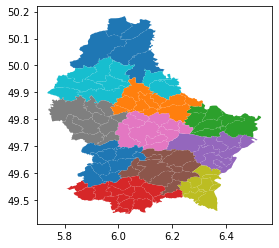

In [14]:
db.plot(column="CANTON", categorical=True)

In [15]:
w_com = weights.block_weights(db["CANTON"].tolist())

/opt/conda/lib/python3.7/site-packages/pysal/lib/weights/weights.py:170: UserWarning: The weights matrix is not fully connected. There are 12 components
  warnings.warn("The weights matrix is not fully connected. There are %d components" % self.n_components)


In [16]:
w_com.transform

'O'

In [17]:
w_com[10]

{3: 1.0,
 38: 1.0,
 45: 1.0,
 58: 1.0,
 71: 1.0,
 75: 1.0,
 85: 1.0,
 93: 1.0,
 96: 1.0,
 98: 1.0}

In [18]:
w_com.transform = "R"

In [19]:
w_com[10]

{3: 0.1,
 38: 0.1,
 45: 0.1,
 58: 0.1,
 71: 0.1,
 75: 0.1,
 85: 0.1,
 93: 0.1,
 96: 0.1,
 98: 0.1}

## Exercises

1. Create a plot with the connections between regions based on `w_cont` on top of the actual regions (polygons) and a basemap
1. Create a histogram for the number of neighbors (`cardinalities`) in the minimum threshold example
1. Create a block weights object based on the `DISTRICT` column. Does it raise any warning? Why?